In [1]:
from classes.QCircuits import *
from classes.QnnTorchConnector import *
from classes.CsvDataset import *
from classes.Utils import *

from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import Statevector
# from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B, COBYLA

import numpy as np
from math import log
from pandas import read_csv, DataFrame, concat

import matplotlib.pyplot as plt

import torch as T

from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split

In [2]:
seed = 43
np.random.seed(seed)
T.manual_seed(seed)

n=3
epochs = 30

dataset_name = 'generated'
save_path = 'loss_data/'+dataset_name+'_'


x,y = datasets.make_classification(n_samples=350, n_features=n,n_informative =n-1, n_redundant =0, n_repeated =0)
df=DataFrame(x)
df['y']=y
  
dataset = CsvDataset(df=df, features=range(n), target=n)

train_dl, test_dl = create_train_test_dataloader(dataset, batch_size=10)

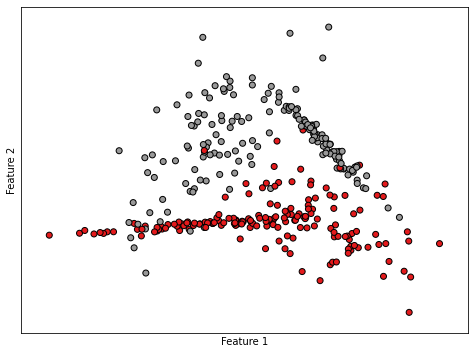

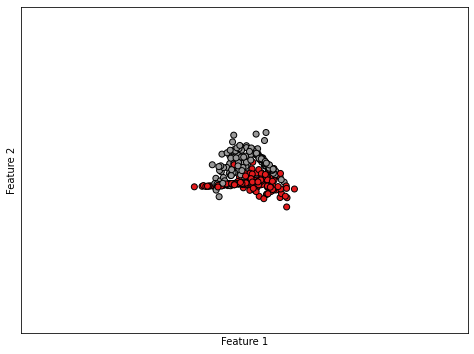

In [3]:
# only plots two features
plot_two_features_classification(x[:,1],x[:,2], y, 'figures/'+dataset_name+'.png')
plot_two_features_classification(dataset.X[:,1],dataset.X[:,2], dataset.y)

In [4]:
create_cnn_and_fit_and_store_result(save_path, dataset, n, epochs, lrn=0.0)

--------create model-----------
param count is : 28
end of run - train loss array is: [0.6764261157766269, 0.4140528635263002, 0.27808420252824195, 0.27160735114179163, 0.26290255346052355, 0.2623124021520115, 0.26108373192051876, 0.26014665118803776, 0.2593983240665242, 0.2587687411851954, 0.25823967129071235, 0.2577989390945599, 0.2574393715308959, 0.2571567107601655, 0.2569489847348195, 0.2568158220741204, 0.25675831574929936, 0.25677907117568455, 0.2568824632393159, 0.25707506985113254, 0.25736619985942416, 0.2577681946191967, 0.25829546314120166, 0.25895932124674187, 0.2597515561149143, 0.26060394723606933, 0.2613174112033941, 0.2615192316743006, 0.2608418394124295, 0.259387806224699]
end of run - val loss array is: [0.6371057900221365, 0.3554318085898079, 0.2965679332769956, 0.29026627946785905, 0.2932133107577584, 0.2925360293072168, 0.2921774952375091, 0.2915605504560177, 0.29095242364466756, 0.29028002736679764, 0.2895551166628006, 0.2887822298945774, 0.2879577118582218, 0.287

(ClassicalNet(
   (hid1): Linear(in_features=3, out_features=3, bias=True)
   (hid2): Linear(in_features=3, out_features=3, bias=True)
   (output): Linear(in_features=3, out_features=1, bias=True)
 ),
 ClassicalNet(
   (hid1): Linear(in_features=3, out_features=3, bias=True)
   (output): Linear(in_features=3, out_features=1, bias=True)
 ))

In [5]:
create_qnn_and_fit_and_store_result(save_path, circuit_type="ZzFeatureMapRealAmplitudeCircuit",
                                    dataset=dataset, n=n, epochs=epochs)

create_qnn_and_fit_and_store_result(save_path, circuit_type="CombinedQnn", dataset=dataset, n=n, epochs=epochs)

--------create model-----------
param count is : 6
end of run - train loss array is: [0.7768466774364473, 0.646216302900652, 0.5554729021956043, 0.5203322708286009, 0.5129368548237461, 0.5120954741894875, 0.5111122914783467, 0.5106089132989197, 0.5104150054532122, 0.510348186626482, 0.5103452599747056, 0.5103701325692668, 0.5104025824581143, 0.5104332557147484, 0.510458813662872, 0.5104789920652362, 0.5104947108460228, 0.5105072115143964, 0.5105176320670827, 0.5105268262170509, 0.5105353331632616, 0.5105435540798499, 0.510551665378866, 0.5105598087269186, 0.5105680119500071, 0.5105762901243283, 0.5105846535501875, 0.5105930514753466, 0.51060145747847, 0.510609900711443]
end of run - val loss array is: [0.6203357162382964, 0.5430497551324196, 0.5058237642823008, 0.49794073131322253, 0.49541910992416005, 0.4942575327443911, 0.49361372101176065, 0.4931917271598919, 0.49293807535124756, 0.4927867439826312, 0.49269368354514076, 0.49263375807829757, 0.49259242966352934, 0.4925614669150104, 0

QnnTorchConnector()

In [7]:
create_hybridqnn_and_fit_and_store_result(save_path, "ZzFeatureMapRealAmplitudeCircuit",
                                          dataset, n, epochs, batch_size=10)

create_hybridqnn_and_fit_and_store_result(save_path, "CombinedQnn", dataset, n, epochs, batch_size=10)
   

--------create model-----------
param count is : 10
end of run - train loss array is: [0.6637840769138937, 0.5993381910911779, 0.5465729195305264, 0.511311537201661, 0.4889852592567227, 0.47338749760954374, 0.46170408888965137, 0.4525304876290263, 0.44506892763214295, 0.43882382893913696, 0.4334725171229528, 0.42879944705392725, 0.424656242321197, 0.42093736517198355, 0.4175655306850948, 0.4144827697582961, 0.4116446918800428, 0.4090166271476911, 0.40657098320568147, 0.40428541372279725, 0.40214153764967486, 0.4001240227904927, 0.3982199245969385, 0.39641819487924684, 0.39470931658492436, 0.3930850246384773, 0.39153808936114715, 0.3900621476448501, 0.38865156950561375, 0.3873013475952559]
end of run - val loss array is: [0.6193562893647111, 0.5577502287081548, 0.5152217319975771, 0.48797996724976644, 0.46938466685463903, 0.45567443982516626, 0.44498816600374547, 0.43631821063802106, 0.4291023317831044, 0.4229830467749858, 0.41770764970781915, 0.41308808198804875, 0.4089854880314471, 0.

HybridClassificationNet(
  (qnn): QnnTorchConnector()
  (cnn): Linear(in_features=3, out_features=1, bias=True)
)

In [9]:
# import qiskit
# qiskit.__qiskit_version__